In [158]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import pickle

In [160]:
#with open('/home/diya/Documents/rat-fes/data/pickles/rat-annie_5-6_session.pkl', 'rb') as inp:
#    session506 = pickle.load(inp)
with open('/home/diya/Documents/rat-fes/data/pickles/rat-annie_5-12_session.pkl', 'rb') as inp:
    session512 = pickle.load(inp)
with open('/home/diya/Documents/rat-fes/data/pickles/rat-annie_5-26_session.pkl', 'rb') as inp:
    session526 = pickle.load(inp)

# how do decoders trained that day fare

In [161]:
#h_angles_506, vaf_angles_506, test_x_angles_506, test_y_angles_506 = session506.decode_angles()
h_angles_512, vaf_angles_512, test_x_angles_512, test_y_angles_512 = session512.decode_angles()
h_angles_526, vaf_angles_526, test_x_angles_526, test_y_angles_526 = session526.decode_angles()
#h_angles, vaf_angles, test_x_angles, test_y_angles = session506.decode_angles()

# limbfoot

## 5/12

In [162]:
h_limbfoot_512 = h_angles_512[:,3]
vaf_limbfoot = np.average(vaf_angles_512, axis=1)[3]
test_y_limbfoot_512=test_y_angles_512[:,3]

0.42454539140700503


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
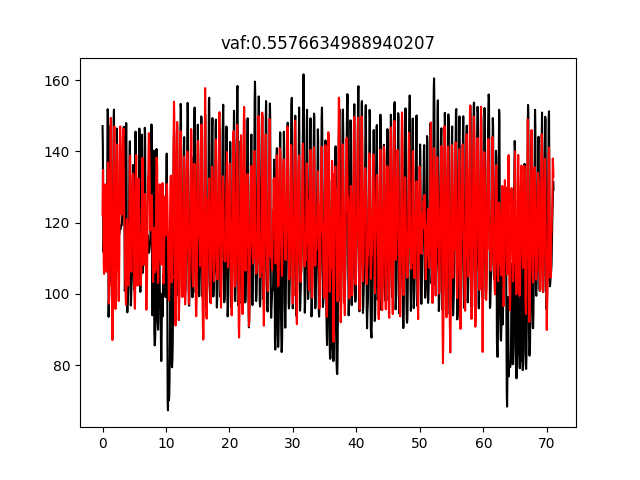

In [163]:
plot_wiener_filter_predic(test_x_angles_512, test_y_limbfoot_512, h_limbfoot_512)
print(vaf_limbfoot)

## 5 26

In [164]:
h_limbfoot_526 = h_angles_526[:,3]
vaf_limbfoot = np.average(vaf_angles_526, axis=1)[3]
test_y_limbfoot_526=test_y_angles_526[:,3]

0.2349352962932117


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
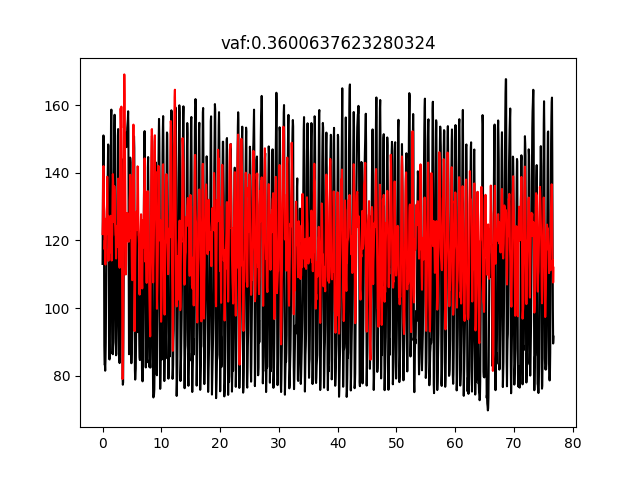

In [165]:
plot_wiener_filter_predic(test_x_angles_526, test_y_limbfoot_526, h_limbfoot_526)
print(vaf_limbfoot)

# toe height decoder

In [18]:
session519.data['coords'][0].shape

(1601, 17, 3)

In [24]:
type(session519.data['coords'])

list

In [32]:
ret = session519.process_toe_height()

In [34]:
h_toe, vaf_toe, x_toe, y_toe = session519.decode_toe_height()

[-0.0150133   0.11963362  0.1493795   0.17615724  0.26843006  0.36778326
  0.30415087  0.3921442   0.35213962  0.39541239]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
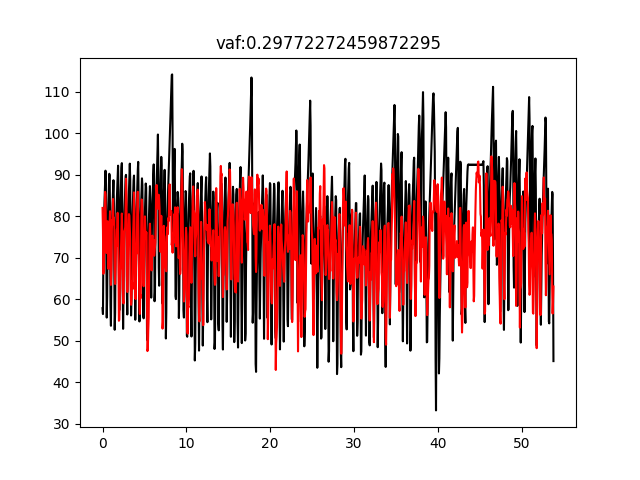

In [11]:
plot_wiener_filter_predic(x_toe, y_toe, h_toe)

# neuron tuning

In [5]:
rates_506, angles_506 = session506.stitch_data(session506.rate_list, session506.angle_list)

In [11]:
session506.get_gait_indices()

In [13]:
X_gait, Y_gait = session506.divide_into_gaits(rates_506, angles_506)

In [14]:
tuned = session506.neuron_tuning(X_gait)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
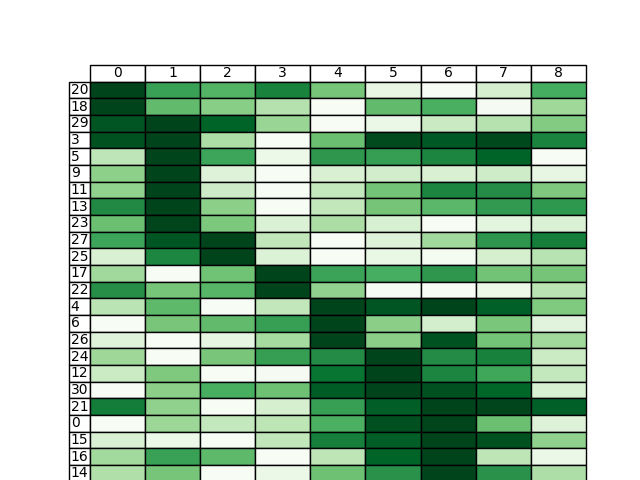

In [15]:
plot_raster(tuned)

# PCA (3 dim visualization)

In [17]:
rates_pca_3, pca_output = apply_PCA(rates.T, 3)
rates_pca_3 = rates_pca_3.T

In [19]:
gait_rates_3, nada = session506.divide_into_gaits(rates_pca_3, angles)

In [21]:
with open('/home/diya/Documents/rat-fes/scripts/session512_gait_rates_3.pkl', 'rb') as inp:
    sess512_gate_rates_3 = pickle.load(inp)

In [59]:
with open('/home/diya/Documents/rat-fes/scripts/session512_rates_3.pkl', 'wb') as inp:
    pickle.dump(rates_pca_3, inp)

In [60]:
with open('/home/diya/Documents/rat-fes/scripts/session512_decoder_angles.pkl', 'wb') as inp:
    pickle.dump([h_angles, vaf_angles, test_x_angles, test_y_angles], inp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
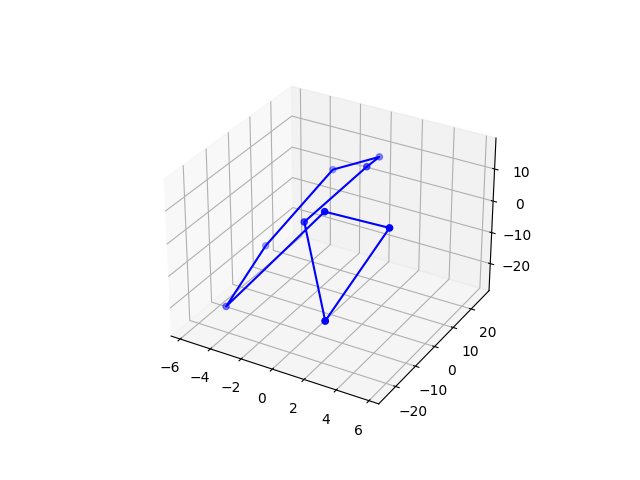

In [20]:
plot_gait_state_space(gait_rates_3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
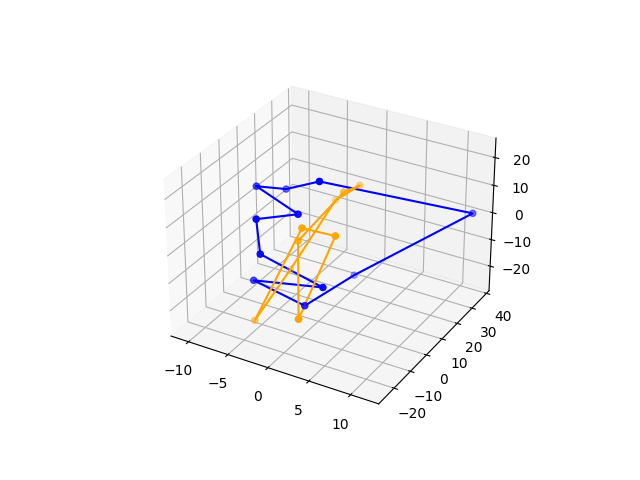

In [23]:
plot_both(sess512_gate_rates_3, gait_rates_3)

# testing 512 decoder on 56

In [24]:
with open('/home/diya/Documents/rat-fes/scripts/session512_decoder_angles.pkl', 'rb') as inp:
    sess506_h, sess506_vaf, sess506_test_x, sess506_test_y = pickle.load(inp)

# knee

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
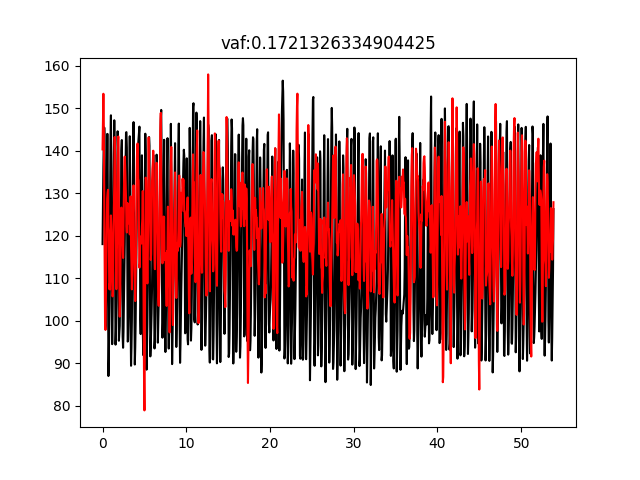

In [39]:
plot_wiener_filter_predic(test_x_angles, test_y_knee, sess506_h[:,3])

# using dimensionality reduction to build decoders

# 506

In [4]:
nada, pca_output_506 = session506.with_PCA(16)
PCA_rates_506, angles_506 = session506.stitch_data(session506.PCA_rate_list, session506.angle_list)
PCA_rates_format_506, angles_format_506 = session506.stitch_and_format(session506.PCA_rate_list, session506.angle_list)

In [ ]:
h_pca_506, vaf_pca_506, x_pca_506, y_pca_506 = decode_kfolds_single(PCA_rates_506, angles_06)

# 512

In [4]:
nada, pca_output_512 = session512.with_PCA(.95)

In [5]:
PCA_rates_512, angles_512 = session512.stitch_data(session512.PCA_rate_list, session512.angle_list)

In [6]:
PCA_rates_format_512, angles_format_512 = session512.stitch_and_format(session512.PCA_rate_list, session512.angle_list)

In [12]:
PCA_rates_format_512.shape

(14210, 160)

In [13]:
h_pca_512, vaf_pca_512, x_pca_512, y_pca_512 = decode_kfolds(PCA_rates_format_512, angles_format_512)

In [14]:
h_pca_512.shape

(161, 7)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
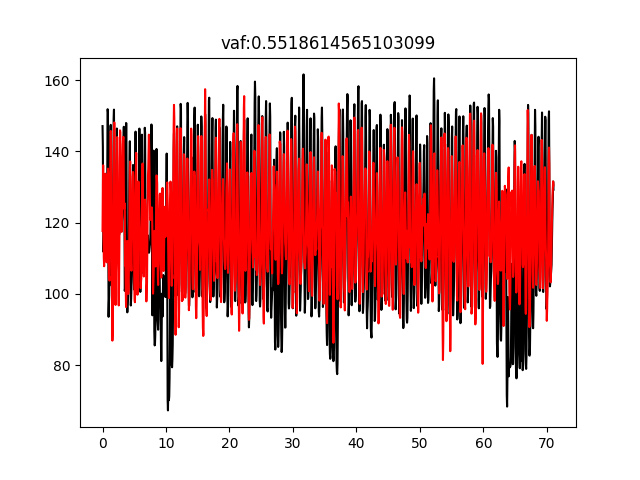

In [33]:
plot_wiener_filter_predic(x_pca_512, y_pca_512[:,3], h_pca_512[:,3])

# CCA 

In [24]:
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

## lets align gait cycles

In [137]:
indices_512, avg_samples_512 = session512.get_gait_indices()

In [138]:
indices_526, avg_samples_526 = session526.get_gait_indices()

In [139]:
gaits_512, angles_512 = session512.remove_bad_gaits()

In [140]:
gaits_526, angles_526 = session526.remove_bad_gaits(avg_gait_samples = avg_samples_512)

In [157]:
print(gaits_526[1:2,:,5])

[[20. 80. 60. 40. 40. 40. 20. 40. 20.  0. 40.]]


In [149]:
test = np.reshape(gaits_526, ((10560,32)))

In [156]:
test[11:22,5]

array([20., 80., 60., 40., 40., 40., 20., 40., 20.,  0., 40.])

In [20]:
stacked_gaits_512 = np.vstack(gaits_512)
stacked_angles_512 = np.vstack(angles_512)
stacked_gaits_526 = np.vstack(gaits_526)
stacked_angles_526 = np.vstack(angles_526)

In [53]:
stacked_gaits_trunc_512 = stacked_gaits_512[:960,:,:]
stacked_angles_trunc_512 = stacked_angles_512[:960,:,:]

In [36]:
960 * 11

10560

In [40]:
X1 = np.reshape(stacked_gaits_trunc_512, (10560, 32))
X2 = np.reshape(stacked_gaits_526, (10560, 32))

In [79]:
Y1 = np.reshape(stacked_angles_trunc_512, (10560, 7))
Y2 = np.reshape(stacked_angles_526, (10560, 7))

In [44]:
cca12 = CCA(n_components=32, scale=False)
X1_cca, X2_cca=cca12.fit_transform(X1, X2)

In [52]:
covar1 = np.corrcoef(X1_cca[:, 0], X2_cca[:, 0])
print(f'{np.round(covar1[0,1]*100)}% correlation')

18.0% correlation


In [93]:
X2_cca_to_X1 = cca12.inverse_transform(X2_cca) 

In [94]:
h_angles_512, vaf_angles_512, test_x_angles_512, test_y_angles_512 = session512.decode_angles()

In [96]:
cca_rates, cca_angles = format_data(X2_cca_to_X1, Y2)

In [111]:
angles_predic_cca = test_wiener_filter(cca_rates, h_angles_512)

In [124]:
vaf(cca_angles[:,3], angles_predic_cca[:,3])

0.28230061833596387

In [127]:
cca_angles.shape

(10550, 7)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
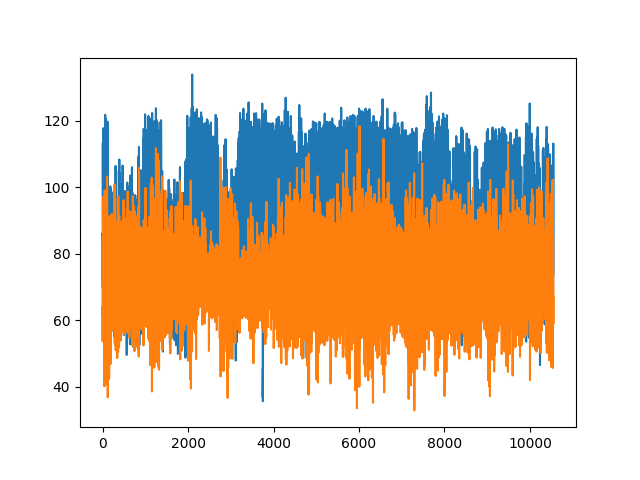

In [130]:
fig, ax = plt.subplots()
ax.plot(angles_526[:,1])
ax.plot(angles_predic_cca[:,1])

In [101]:
rates_526, angles_526 = format_data(X2, Y2)

In [115]:
angles_predic = test_wiener_filter(rates_526, h_angles_512)

In [116]:
vaf(angles_526[:,1], angles_predic[:,1])

0.11889870276697412

In [49]:
X_c.shape

(10809, 16)

In [50]:
Y_c.shape

(10809, 16)

In [48]:
angles_506.shape

(7, 10809)

In [47]:
session506.get_gait_indices()

In [52]:
aligned_506_gait, nada = session506.divide_into_gaits(Y_c.T, angles_506)

In [53]:
aligned_512_gait, nada = session506.divide_into_gaits(X_c.T, angles_512[:,:10809])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
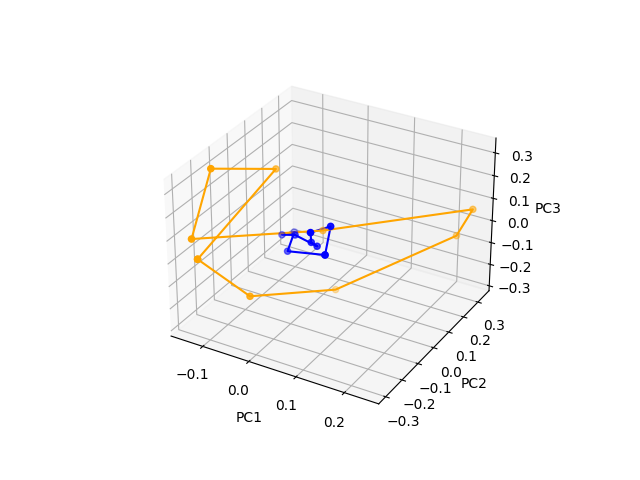

In [68]:
plot_both(np.array(aligned_512_gait), np.array(aligned_506_gait))

In [66]:
Y_c_inverse = ca.inverse_transform(Y_c)

In [67]:
Y_c_inverse.shape

(10809, 16)

In [70]:
angles_506.shape

(7, 10809)

In [15]:
#with open('/home/diya/Documents/rat-fes/scripts/session506_inverse_data.pkl', 'wb') as inp:
#    pickle.dump([Y_c_inverse, angles_506], inp)
with open('/home/diya/Documents/rat-fes/scripts/session506_inverse_data.pkl', 'rb') as inp:
    Y_c_inverse, angles_506 = pickle.load(inp)

# trying inverse using 512 decoder

In [23]:
Y_c_inverse_format, angles_format_506 = format_data(Y_c_inverse.T, angles_506)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
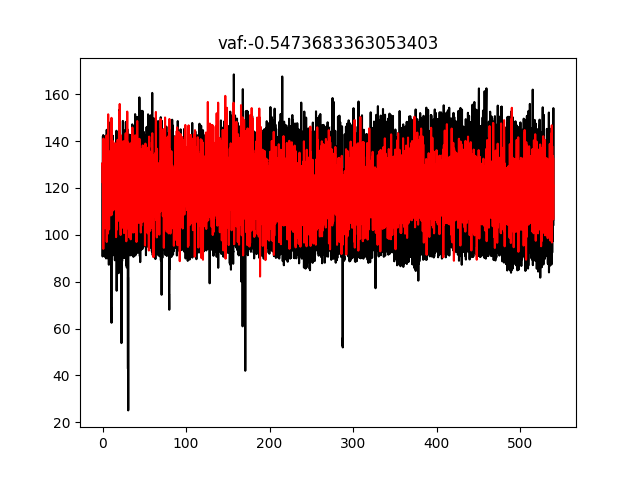

In [40]:
plot_wiener_filter_predic(Y_c_inverse_format, angles_format_506[:,3], h_pca_512[:,3])

In [26]:
Y_c_inverse_format.shape

(10799, 160)

In [38]:
angles_format_506.shape

(10799, 7)